In [1572]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1573]:
dataset = pd.read_excel('data_1.xlsx', sheet_name='data')

In [1574]:
dataset

,BITS ID,Campus,Program Applied to,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Did you choose to work for a few months/years before applying to graduate school?,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Was the above PS2/Thesis experience relevant to your application profile?,Internship other than PS1/PS2,Did you join any other classes/consultancy for your application process ?,Journal / Conference ( if your paper was published )
0,2015A7TS0081P,Pilani,MS,Computer Science,Artificial Intelligence/ Machine Learning,7.93,Arizona State University,154,170,4,...,NO,Yes,1.50,NaN,Singapore University of Tech and Design,Reinforcement Learning for path planning. Was ...,NO,Yes,NO,MDPI Applied Sciences
1,2012C6PSC6598P,Pilani,MS,Computer Science,NaN,6.7,Arizona State University,159,167,3.5,...,NO,Yes,1.50,CSIR- National Aerospace Laboratories,PS 2,Worked at Khosla labs,Yes,NO,NO,NO
2,2014A3PS224P,Pilani,MS,Mechanical Engineering,Robotics,7.78,Arizona State University,154,169,3.5,...,NO,NO,0.00,NaN,Infinera,Hardware Testing,NO,NO,NO,NaN
3,2015A3PS0270P,Pilani,MS,Computer Science,NaN,7.98,Arizona State University,148,169,4,...,NO,NO,0.50,NaN,NaN,NaN,Yes,NO,NO,NaN
4,2012B1A4761P,Pilani,PhD,BioEngineering,Tissue Engineering,8.4,Boston University,163,164,5,...,YES,Yes,1.50,NaN,Thesis - Harvard Medical School,"Design and development of cell phone enabled, ...",Yes,Yes,NO,"5 publications - ACS NaNO, Nature Communicatio..."
5,2012B1A4786P,Pilani,MS+PhD,Bioengineering,NaN,7.46,Boston University,155,163,4,...,NO,Yes,2.00,"CHAMBAL FERTILISERS AND CHEMICALS LIMITED, KOTA","Brigham and Women's Hospital, Harvard Medical ...",Developed and fabricated microfluidic models f...,Yes,NOne,NO,2 Indian patent applications in process
6,2011A7TS074P,Pilani,PhD,Computer Science,Artificial Intelligence/ Machine Learning,8.54,Carnegie Mellon,170,169,5,...,YES,NO,0.50,NaN,NaN,NaN,NaN,NaN,Yes,NaN
7,2015A2TS0550H,Hyderabad,MS,Civil Engineering,Transportation Engineering,9.03,Carnegie Mellon University,151,169,2.5,...,YES,NO,0.00,NaN,On campus thesis,NaN,Yes,Yes,Yes,NaN
8,2007B2A4655G,Goa,MS,Other,Public Policy,6.31,Carnegie Mellon University,165,167,4.5,...,YES,Yes,2.00,Mphasis Ltd.\nTook 2 Recommendations from Work...,NaN,NaN,NO,NO,NO,NaN
9,2012A3PS259H,Hyderabad,MS,Mechanical Engineering,Robotics,8.46,Carnegie Mellon University,151,167,3,...,NO,NO,0.00,NaN,"Tonbo Imaging, Bangalore",NaN,Yes,NO,NO,NOne


Shuffling dataframe to not be dependent on time based factors

In [1575]:
#dataset.sample(frac=1).reset_index(drop=True, inplace=True)

In [1576]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 23 columns):
BITS ID                                                                              1432 non-null object
Campus                                                                               1431 non-null object
Program Applied to                                                                   1431 non-null object
Target Discipline                                                                    1381 non-null object
Sub-Discipline                                                                       1004 non-null object
CGPA                                                                                 1431 non-null object
University Selected                                                                  1012 non-null object
GRE Score : Verbal                                                                   1415 non-null object
GRE Score : Quant                            

Renaming few columns 

In [1577]:
dataset.columns = (['BITS ID', 'Campus', 'Program Applied', 'Target Discipline',
       'Sub-Discipline', 'CGPA', 'University Selected', 'GRE Score : Verbal',
       'GRE Score : Quant', 'GRE Score : AWA', 'TOEFL Score',
       'Universities Applied', 'Universities Admit',
       'Universities (Funded admit)',
       'Work experience',
       'Duration of work experience', 'Work Experience details',
       'PS2/Thesis Organization', 'PS2/Thesis Details',
       'Relevance of PS2/Thesis to program',
       'Internship other than PS1/PS2',
       'Consultancy/Classes',
       'Conference publication'])

In [1578]:
dataset.isnull().sum()

BITS ID                                  2
Campus                                   3
Program Applied                          3
Target Discipline                       53
Sub-Discipline                         430
CGPA                                     3
University Selected                    422
GRE Score : Verbal                      19
GRE Score : Quant                       18
GRE Score : AWA                         25
TOEFL Score                             43
Universities Applied                     4
Universities Admit                     320
Universities (Funded admit)            177
Work experience                        245
Duration of work experience            254
Work Experience details                889
PS2/Thesis Organization                351
PS2/Thesis Details                     898
Relevance of PS2/Thesis to program     423
Internship other than PS1/PS2          894
Consultancy/Classes                    565
Conference publication                1227
dtype: int6

In [1579]:
dataset[dataset['BITS ID'].isnull()]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1580]:
dataset[dataset['CGPA'].isnull()]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
1135,Batch 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All values are NANs for missing ID values, implying empty rows 

In [1581]:
dataset.dropna(subset=['BITS ID','CGPA'], inplace=True)

Dealt with missing values in crucial field that werent supposed to be missing 

In [1582]:
dataset.isnull().mean()*100

BITS ID                                0.000000
Campus                                 0.000000
Program Applied                        0.000000
Target Discipline                      3.494060
Sub-Discipline                        29.839273
CGPA                                   0.000000
University Selected                   29.280224
GRE Score : Verbal                     1.118099
GRE Score : Quant                      1.048218
GRE Score : AWA                        1.537386
TOEFL Score                            2.795248
Universities Applied                   0.069881
Universities Admit                    22.152341
Universities (Funded admit)           12.159329
Work experience                       16.911251
Duration of work experience           17.540182
Work Experience details               61.914745
PS2/Thesis Organization               24.318658
PS2/Thesis Details                    62.543676
Relevance of PS2/Thesis to program    29.350105
Internship other than PS1/PS2         62

Dealing with target discipline column

In [1583]:
a = dataset[dataset['Target Discipline'].isnull()]
a

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
117,2015ABTS0796H,Hyderabad,MS,NaN,NaN,8.1,Pennsylvania State University,155,167,3.5,...,NO,NO,0.5,NaN,IIM Bangalore,SupplyChain Management,Yes,Yes,NaN,Production and Operations Management Society
505,2011ABPS521P,Pilani,MS,NaN,NaN,7.4,NOrthwestern University,161,169,3.5,...,NO,NO,0.0,NaN,NaN,NaN,NO,IIT Bombay,NO,NaN
1058,2007A7PS044P,Pilani,PhD,NaN,Systems and Networking,9.49,NaN,660,800,4,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059,2008A1PS500G,Goa,MS,NaN,Aerospace Engineering,7.37,Penn State (NO Aid),650,800,4,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,2006B5A3657,Pilani,MS,NaN,"DSP, Digital Systems Design",8,"Maryland, PennState, TAMU, NCSU",157,164,3,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,2006a4ps313p,Pilani,MS,NaN,Industrial engineering,9.53,Tamu-College station(aid NOt yet declared),720,710,4,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,2006c6ps249p,Pilani,MS,NaN,Artificial Intelligence/ Machine Learning,9.26,Stanford\nETH Zurich\nUMass Amherst,730,730,3.5,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,2006A8PS280,Pilani,MS,NaN,Digital IC Design,8.94,"Columbia, TAMU, Virginia Tech, UoMinnesota (al...",660,700,3,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,2007A7PS132,Pilani,PhD,NaN,Theoretical Science,9.35,MPI-SWS (Max Plank INstitute of Software Syste...,600,760,4,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,2006A3PS172,Pilani,MS,NaN,Analog and Mixed Signal,9.07,Univ of Columbia,690,700,4,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As subdiscipline values are not null for target discipline being null, we dont have to drop these rows. 

In [1584]:
dataset['Target Discipline'] = dataset['Target Discipline'].str.strip()
dataset['Target Discipline'].unique()

array(['Computer Science', 'Mechanical Engineering', 'BioEngineering',
       'Bioengineering', 'Civil Engineering', 'Other',
       'Environmental Engineering',
       'Electrical and Electronics Engineering', 'Engineering Management',
       'Chemical Engineering', 'EcoNOmics', 'Physics',
       'Mathematics/Statistics', 'Biological Sciences', 'Finance', nan,
       'Computational Science', 'Business Analytics',
       'Pharmaceutical Sciences', 'Chemistry', 'Zoology', 'Management',
       'computer science', 'Engineering Technology', 'Biology',
       'Aerospace Engineering', 'Biological sciences'], dtype=object)

There are multiple duplicate categories to be dealt with. Eg. 'Computer science', 'computer science' are the same categories.

In [1585]:
l = dataset[dataset.loc[:,'Target Discipline'] == 'computer science'].index 
dataset.loc[l,'Target Discipline'] = 'Computer Science'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Computational Science'].index
dataset.loc[l,'Target Discipline'] = 'Computer Science'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Biological sciences'].index 
dataset.loc[l,'Target Discipline'] = 'Biology'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Biological Sciences'].index
dataset.loc[l,'Target Discipline'] = 'Biology'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Zoology'].index
dataset.loc[l,'Target Discipline'] = 'Biology'
l = dataset[dataset.loc[:,'Target Discipline'] == ' Bioengineering'].index 
dataset.loc[l,'Target Discipline'] = 'Bioengineering'
l = dataset[dataset.loc[:,'Target Discipline'] == 'BioEngineering'].index 
dataset.loc[l,'Target Discipline'] = 'Bioengineering'
l = dataset[dataset.loc[:,'Target Discipline'] == 'EcoNOmics'].index
dataset.loc[l,'Target Discipline'] = 'Economics'











In [1586]:
l = dataset[dataset['Target Discipline'].isnull() & dataset['Sub-Discipline'].isnull()].index
dataset.drop(l, inplace=True)

In [1587]:
dataset['Target Discipline'].value_counts()

Computer Science                          511
Electrical and Electronics Engineering    344
Mechanical Engineering                    214
Chemical Engineering                       60
Civil Engineering                          56
Biology                                    25
Bioengineering                             23
Physics                                    21
Pharmaceutical Sciences                    21
Mathematics/Statistics                     20
Other                                      19
Business Analytics                         17
Finance                                    16
Environmental Engineering                  12
Engineering Management                      6
Economics                                   5
Management                                  5
Engineering Technology                      2
Aerospace Engineering                       2
Chemistry                                   2
Name: Target Discipline, dtype: int64

Merging related fields like Economics and Finance, Aerospace and mechanical. This step is performed to create a more balanced dataset

In [1588]:
l = dataset[dataset.loc[:,'Target Discipline'] == 'Economics'].index
dataset.loc[l,'Target Discipline'] = 'Finance'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Engineering Management'].index 
dataset.loc[l,'Target Discipline'] = 'Management'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Aerospace Engineering'].index 
dataset.loc[l,'Target Discipline'] = 'Mechanical Engineering'

Dealing with 'other' category 

In [1589]:
dataset[dataset['Target Discipline'] == 'Other']['Sub-Discipline'].value_counts().index

Index(['Public Policy ', 'Computational Sciences', 'Media Arts and Sciences',
       'UX Research', 'Music techNOlogy', 'Public Policy'],
      dtype='object')

Accomodating them in current categories for Target variables if possible to prevent them acting as outliers

In [1590]:
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Public Policy')].loc[:,'Target Discipline'].index 
dataset.at[l,'Target Discipline'] = 'Finance'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Public Policy ')].loc[:,'Target Discipline'].index
dataset.at[l,'Target Discipline'] = 'Finance'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Computational Sciences')].loc[:,'Target Discipline'].index
dataset.at[l,'Target Discipline'] = 'Computer Science'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='UX Research')].loc[:,'Target Discipline'].index
dataset.at[l,'Target Discipline'] = 'Computer Science'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Music techNOlogy')].loc[:,'Target Discipline'].index 
dataset.at[l,'Target Discipline']= 'Electrical and Electronics Engineering'

In [1591]:
dataset[dataset.loc[:,'Target Discipline'] == 'Other']['Sub-Discipline']

35                         NaN
86     Media Arts and Sciences
551                        NaN
554                        NaN
555                        NaN
557                        NaN
565                        NaN
571                        NaN
599                        NaN
601                        NaN
602                        NaN
611                        NaN
628                        NaN
755                        NaN
Name: Sub-Discipline, dtype: object

Imputing Nan value in Target disiciple from Sub-Discipline

In [1592]:
dataset['Target Discipline'].isnull().sum()

48

In [1593]:
dataset[dataset.loc[:,'Target Discipline'].isnull()]['Sub-Discipline'].value_counts().index

Index(['VLSI', 'Artificial Intelligence/ Machine Learning',
       'Construction Engineering and Management', 'Systems and Networking',
       'Structural Health Monitoring and Structural Control',
       'Mobile Communications', 'Mechanical-Design and Manufacturing',
       'DataScience', 'Information Security', 'Digital IC Design',
       'Developmental Biology', 'Theoretical Science', 'RF IC',
       'Distributed Systems', 'DSA and Networks', 'Network Security',
       'Database Systems', 'Networks and Distributed Systems',
       'Analog and Mixed Signal ',
       'Materials and minerals; Process simulations', 'Design Engineering',
       'Storage Area Networks', 'Cognitive Neuroscience', 'Fracture Mechanics',
       'MIS', 'Management Information Systems', 'DSP, Digital Systems Design',
       'Land use and transportation planning', 'Industrial engineering',
       'Design', 'mechanical', 'Communications&Signal Processing',
       'Power Electronics', 'Audio Engineering/Music Tech

dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')].fillna({'Target Discipline' : 'Civil Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Land use and transportation planning')].loc[:,'Target Discipline'] = dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Land use and transportation planning')].fillna({'Target Discipline' : 'Civil Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Developmental Biology')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Developmental Biology')].fillna({'Target Discipline' : 'Biology'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Materials and minerals; Process simulations')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Materials and minerals; Process simulations')].fillna({'Target Discipline' : 'Chemical Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'environmental engineering')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'environmental engineering')].fillna({'Target Discipline' : 'Environmental Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Finance')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Finance')].fillna({'Target Discipline' : 'Environmental Engineering'})


In [1594]:
#dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')]= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')].fillna('Civil Engineering', inplace= True)
#dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')]


Removing Garbage values , with Nan in all columns

Defining functions for target disicipline with lots of subdisciplines

In [1595]:
def mechanical(subdiscipline):
    l = dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.loc[l,'Target Discipline'] = 'Mechanical Engineering'

In [1596]:
def computers(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.loc[l,'Target Discipline'] = 'Computer Science'

In [1597]:
def electronics(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.at[l,'Target Discipline'] = 'Electrical and Electronics Engineering'

In [1598]:
def biology(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.at[l,'Target Discipline'] = 'Biology'

In [1599]:
def civil(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.at[l,'Target Discipline'] = 'Civil Engineering'

Defining lists for different subdisciplines related to a target discipline

In [1600]:
lis_mech = ['Automobile ', 'Mechanical-Design and Manufacturing','Fracture Mechanics', 'Aerospace Engineering', 'Sustainable Systems', 'Industrial engineering','Design Engineering','mechanical'  ]
lis_comp= ['MIS','Systems and Networking','Storage Area Networks','Management Information Systems', 'DataScience','Artificial Intelligence/ Machine Learning','Distributed Systems','Networks and Distributed Systems','Information Systems Management','DSA and Networks','Network Security','Database Systems','Information Security']
lis_elec = ['Audio Engineering/Music TechNOlogy','RF IC','Analog and Mixed Signal ','Analog and Mixed Signal','VLSI','Mobile Communications','Communications&Signal Processing','Analog and Mixed Signal','DSP, Digital Systems Design','Power Electronics', 'Digital IC Design','Reversible logic, quantum computing, Communication Engineering','Design']
lis_bio = ['Developmental Biology','Neuroscience','Cognitive Neuroscience','Structural Health Monitoring and Structural Co...']
lis_civil = ['Construction Engineering and Management','Land use and transportation planning']

In [1601]:
for i in lis_mech: 
    mechanical(i)
for i in lis_comp:
    computers(i)
for i in lis_elec:
    electronics(i)
for i in lis_bio:
    biology(i)
for i in lis_civil:
    civil(i)

In [1602]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'environmental engineering')].index
dataset.at[l,'Target Discipline'] = 'Environmental Engineering'


In [1603]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Theoretical Science')].index
dataset.at[l,'Target Discipline'] = 'Physics'

In [1604]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Finance')].index
dataset.at[l,'Target Discipline'] = 'Finance'

In [1605]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Materials and minerals; Process simulations')].index
dataset.at[l,'Target Discipline'] = 'Chemical Engineering'

In [1606]:
l = dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Management Science and Engineering')].index
dataset.at[l,'Target Discipline'] = 'Management'

In [1607]:
dataset[dataset['Target Discipline'].isna()]['Sub-Discipline']

1084    Structural Health Monitoring and Structural Co...
Name: Sub-Discipline, dtype: object

In [1608]:
dataset.loc[1084,'Target Discipline'] = 'Biology'

Dealing with other categorical columns

"Work Experience"

In [1609]:
dataset['Work experience'].unique()

array(['Yes', 'NO', nan, 'yes', 'no'], dtype=object)

In [1610]:
l = dataset[dataset.loc[:,'Work experience']== 'yes'].loc[:,'Work experience'].index
dataset.at[l,'Work experience'] = 'Yes'
l = dataset[dataset.loc[:,'Work experience']== 'no'].loc[:,'Work experience'].index
dataset.at[l,'Work experience'] = 'NO'

Imputing missing values in this column as No

In [1611]:
dataset['Work experience'].fillna('NO', inplace= True)    

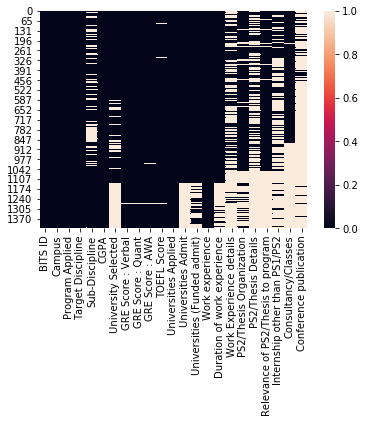

In [1612]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(dataset.isnull())

In [1613]:
dataset.drop(31, inplace= True)                            #dealing with random string values in CGPA column

In [1614]:
dataset[dataset['CGPA'] > 9].loc[:,'GRE Score : Quant'].unique() 

array([169, 167, 170, 168, 166, 165,
       'NA (GRE NOt required for the application)', 163, nan, 162, 155,
       160, 164, 154, 111, 800, 710, 730, 760, 700, 720, 790, 770, 340,
       300, 600, 640, 740, 500, 650, 630, 530, 620], dtype=object)

In [1615]:
#dealing with random string values in GRE column
l = dataset[dataset['GRE Score : Verbal'] == 'NA (GRE NOt required for the application)'].index
dataset.drop(l,inplace= True)
dataset.loc[957, 'GRE Score : Verbal'] = 150

In [1616]:
l = dataset[dataset['GRE Score : Verbal'] == 0].index
dataset.at[l,'GRE Score : Verbal'] = np.nan
l = dataset[dataset['GRE Score : Verbal'] == 'no'].index
dataset.at[l,'GRE Score : Verbal'] = np.nan
l = dataset[dataset['GRE Score : Quant'] == 'no'].index
dataset.at[l,'GRE Score : Quant'] = np.nan
l = dataset[dataset['GRE Score : Quant'] == 0].index
dataset.at[l,'GRE Score : Quant'] = np.nan

As visible the data consists of scores both in range 0-340(new format) and 0-1400(old) format. Therefore suitable conversion of the old scores to new scale is required

#### Defining dictionary for conversion based on conversion tables available online

In [1617]:
#Quant conversion 
quant_dict = dict({800:166,790:164,780:163,770:161,760:160,750:159,745: 159 ,740:158,730:157,720:156,710:155,700:155,690:154,680:153,670:152,660:152,650:151,640:151,630:150,620:149,610:149,600:148,590:148,580:147,570:147,560:146,550:146,540:145,530:145,520:144,510:144,500:144,490:143,480:143,470:142,450:141 ,400:140,340:137, 322:137, 300:136 })
dataset.replace({"GRE Score : Quant": quant_dict}, inplace= True)
dataset['GRE Score : Quant'].unique()

array([170., 167., 169., 164., 163., 168., 166., 165., 161., 150., 162.,
       159.,  nan, 157.,  49., 160., 156.,  50., 151., 155., 154., 111.,
       158., 144., 137., 145., 148., 153., 152., 880., 140., 136., 149.,
       146., 141.])

In [1618]:
#replacing outliers with nan
l = dataset[dataset['GRE Score : Quant'] == 880].index
dataset.at[l,'GRE Score : Quant'] = np.nan
l = dataset[dataset['GRE Score : Quant'] == 49].index
dataset.at[l,'GRE Score : Quant'] = np.nan
l = dataset[dataset['GRE Score : Quant'] == 50].index
dataset.at[l,'GRE Score : Quant'] = np.nan

In [1619]:
dataset['GRE Score : Quant'].unique()

array([170., 167., 169., 164., 163., 168., 166., 165., 161., 150., 162.,
       159.,  nan, 157., 160., 156., 151., 155., 154., 111., 158., 144.,
       137., 145., 148., 153., 152., 140., 136., 149., 146., 141.])

In [1620]:
dataset['GRE Score : Verbal'].unique()

array([154, 159, 148, 163, 155, 170, 151, 165, 157, 161, 158, 150, 167,
       160, 156, 168, 149, 153, 166, 164, 162, 152, 140, 147, 143, 145,
       144, 146, nan, 38, 169, 650, 430, 111, 490, 510, 530, 171, 331,
       670, 630, 580, 680, 610, 400, 640, 321, 570, 550, 590, 560, 322,
       420, 520, 460, 660, 780, 720, 730, 311, 600, 314, 800, 690, 323,
       332, 700, 313, 710, 740, 620, 320, 770, 315, 328, 309, 760, 745,
       326, 327, 319, 750, 304, 318, 790, 540, 500], dtype=object)

In [1621]:
# Verbal conversion 
verb_dict = dict({800:170,790:170,780:170,770:170,760:170,750:169,745: 169, 740:169,730:168,720:168,710:167,700:166,690:165,680:165,670:164,660:164,650:163,640:162,630:162,620:161,610:160,600:160,590:159,580:158,570:158,560:157,550:156,540:156,530:155,520:154,510:154,500:153,490:152,440:149,460:151,420:148,400:146,320:140, 315:139, 311: 139, 314: 139, 313: 139, 319: 139, 315: 139, 326: 141, 328: 141, 327: 141, 323: 140 , 322: 140,321: 140,430:149, 331: 141, 332: 141 , 309: 139, 304: 138, 318: 140 })
dataset.replace({"GRE Score : Verbal": verb_dict}, inplace= True)
dataset['GRE Score : Verbal'].unique()

array([154., 159., 148., 163., 155., 170., 151., 165., 157., 161., 158.,
       150., 167., 160., 156., 168., 149., 153., 166., 164., 162., 152.,
       140., 147., 143., 145., 144., 146.,  nan,  38., 169., 111., 171.,
       141., 139., 138.])

In [1622]:
#replacing outliers with nan
l = dataset[dataset['GRE Score : Verbal'] == 38].index
dataset.at[l,'GRE Score : Verbal'] = np.nan
l = dataset[dataset['GRE Score : Verbal'] == 171].index
dataset.at[l,'GRE Score : Verbal'] = np.nan

In [1623]:
dataset[dataset['GRE Score : Verbal'] == 111]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
552,3,Dubai,PhD,Civil Engineering,NaN,21,EPFL,111.0,111.0,5,...,NO,NO,0.0,NaN,NaN,NaN,NaN,NaN,NO,NaN


In [1624]:
#dropping this particular outlier
l = dataset[dataset['GRE Score : Verbal'] == 111].index
dataset.drop(l, inplace= True)

Imputing values for GRE score based on mean of GRE scores of other candidates with similar cgpa 

In [1625]:
dataset['CGPA'] = pd.to_numeric(dataset['CGPA'])
dataset['GRE Score : Quant'] = pd.to_numeric(dataset['GRE Score : Quant'])
cg9_verbal = dataset[dataset['CGPA'] >= 9].loc[:,'GRE Score : Verbal'].mean()
cg9_quant = dataset[dataset['CGPA'] >=9].loc[:,'GRE Score : Quant'].mean()
cg8_verbal = dataset[(dataset['CGPA'] >= 8) & (dataset['CGPA'] < 9)].loc[:,'GRE Score : Verbal'].mean()
cg8_quant = dataset[(dataset['CGPA'] >= 8) & (dataset['CGPA'] < 9)].loc[:,'GRE Score : Quant'].mean()
cg7_verbal = dataset[(dataset['CGPA'] >= 7) & (dataset['CGPA'] < 8)].loc[:,'GRE Score : Verbal'].mean()
cg7_quant = dataset[(dataset['CGPA'] >= 7) & (dataset['CGPA'] < 8)].loc[:,'GRE Score : Quant'].mean()
cg6_verbal = dataset[(dataset['CGPA'] >= 6) & (dataset['CGPA'] < 7)].loc[:,'GRE Score : Verbal'].mean()
cg6_quant = dataset[(dataset['CGPA'] >= 6) & (dataset['CGPA'] < 7)].loc[:,'GRE Score : Quant'].mean()
cg5_verbal = dataset[dataset['CGPA'] <6].loc[:,'GRE Score : Verbal'].mean()
cg5_quant = dataset[dataset['CGPA'] <6].loc[:,'GRE Score : Quant'].mean()

Setting values for quant

In [1626]:
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] >= 9)].index
dataset.loc[l, 'GRE Score : Quant'] = cg9_quant
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] < 9) & (dataset['CGPA'] >= 8)  ].index
dataset.loc[l, 'GRE Score : Quant'] = cg8_quant
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] < 8) & (dataset['CGPA'] >= 7)  ].index
dataset.loc[l, 'GRE Score : Quant'] = cg7_quant
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] < 7) & (dataset['CGPA'] >= 6)  ].index
dataset.loc[l, 'GRE Score : Quant'] = cg6_quant
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] < 6) ].index
dataset.loc[l, 'GRE Score : Quant'] = cg5_quant

Setting values for verbal

In [1627]:
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] >= 9)].index
dataset.loc[l, 'GRE Score : Verbal'] = cg9_verbal
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] < 9) & (dataset['CGPA'] >= 8)  ].index
dataset.loc[l, 'GRE Score : Verbal'] = cg8_verbal
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] < 8) & (dataset['CGPA'] >= 7)  ].index
dataset.loc[l, 'GRE Score : Verbal'] = cg7_verbal
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] < 7) & (dataset['CGPA'] >= 6)  ].index
dataset.loc[l, 'GRE Score : Verbal'] = cg6_verbal
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] < 6) ].index
dataset.loc[l, 'GRE Score : Verbal'] = cg5_verbal

GRE: AWA

In [1628]:
dataset['GRE Score : AWA'].unique()

array([4, 3.5, 5, 2.5, 4.5, 3, 315, 5.5, nan, 0, 3.4, 329, 313, 6, 3.6,
       'no', 2], dtype=object)

In [1629]:
l = dataset[dataset['GRE Score : AWA'] == 'no'].index
dataset.at[l,'GRE Score : AWA'] = np.nan
l = dataset[dataset['GRE Score : AWA']> 300].index
dataset.at[l,'GRE Score : AWA'] = np.nan
l = dataset[dataset['GRE Score : AWA'] == 0].index
dataset.at[l,'GRE Score : AWA'] = np.nan

In [1630]:
dataset[(dataset['GRE Score : AWA'].isnull())]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
83,2015A1PS0734G,Goa,MS,Civil Engineering,Water Resources Engineering,8.37,KU Leuven,149.000000,166.000000,NaN,...,NO,Yes,0.0,NaN,NUS,NaN,Yes,NO,Yes,"Electrochemical Society Transactions, Environm..."
208,2011B2PS759P,Pilani,MS,Computer Science,Data Science,6.70,University of Cincinnati,156.015504,165.000000,NaN,...,NO,NO,0.5,NaN,Flipkart,NaN,Yes,NO,NO,NaN
252,2011A7PS317P,Pilani,MS,Computer Science,Artificial Intelligence/ Machine Learning,9.25,University of Oxford,159.871866,163.505587,NaN,...,NO,Yes,2.5,IBM Research,Flipkart Internet Pvt. Ltd.,NaN,Yes,NaN,NO,http://ieeexplore.ieee.org/document/7877283/
387,2005A8PS267G,Goa,MS,Mathematics/Statistics,Applied Stochastic and Statistics,7.79,"NTNU NOrway, Chalmers Sweden",156.960212,163.603175,NaN,...,yes,Yes,5.0,BHEL at Power Sector Marketing\n\nI was workin...,"Tenisilica, Pune",Something related to microprocessor programming.,NO,NaN,"Yes, but they were NOt much beneficial",NOne
404,2008B2A3553G,Goa,MS,Computer Science,NaN,7.22,UFL,152.000000,164.000000,NaN,...,NO,Yes,5.0,NaN,NaN,NaN,NaN,NaN,"Yes, but they were NOt much beneficial",NaN
436,2012A8TS297P,Pilani,MS,Electrical and Electronics Engineering,Music techNOlogy,6.47,Georgia Tech,163.000000,165.000000,NaN,...,NO,NO,0.5,NaN,Georgia Tech,Music Structure Analysis using rhythm features...,Yes,"JSW Cement, Nandyal",NO,NOne
453,2011B1A8688G,Goa,MS,Computer Science,Information Systems Management,7.00,"University of Maryland, College Park",155.000000,167.000000,NaN,...,NO,NO,0.5,NaN,"Sellerworx, Bangalore",NaN,Yes,"Indian Institute of Science, Bangalore",NO,0
464,2014A0PS360G,Goa,MS,Chemical Engineering,NaN,0.00,NOne,160.230769,165.428571,NaN,...,NO,NO,0.0,NaN,NaN,NaN,NaN,NaN,NO,0
466,2009A8PS363G,Goa,MS,Computer Science,NaN,5.96,"George Washington University, Washington DC",160.230769,165.000000,NaN,...,NO,Yes,5.0,NaN,NaN,NaN,NaN,NaN,"Yes, they were worth the fees.",NaN
546,2008A3PS252H,Hyderabad,MS,Computer Science,NaN,7.20,NaN,162.000000,167.000000,NaN,...,NO,Yes,3.0,Software engineer,NaN,NaN,NaN,NaN,NO,NaN


Imputing null values 

In [1631]:
dataset['GRE Score : AWA'] = pd.to_numeric(dataset['GRE Score : AWA'])
cg9_awa = dataset[dataset['CGPA'] >= 9].loc[:,'GRE Score : AWA'].mean()
cg8_awa = dataset[(dataset['CGPA'] >= 8) & (dataset['CGPA'] < 9)].loc[:,'GRE Score : AWA'].mean()
cg7_awa = dataset[(dataset['CGPA'] >= 7) & (dataset['CGPA'] < 8)].loc[:,'GRE Score : AWA'].mean()
cg6_awa = dataset[(dataset['CGPA'] >= 6) & (dataset['CGPA'] < 7)].loc[:,'GRE Score : AWA'].mean()
cg5_awa = dataset[dataset['CGPA'] <6].loc[:,'GRE Score : AWA'].mean()

In [1632]:
l = dataset[(dataset['GRE Score : AWA'].isnull()) & (dataset['CGPA'] >= 9)].index
dataset.loc[l, 'GRE Score : AWA'] = cg9_awa
l = dataset[(dataset['GRE Score : AWA'].isnull()) & (dataset['CGPA'] < 9) & (dataset['CGPA'] >= 8)  ].index
dataset.loc[l, 'GRE Score : AWA'] = cg8_awa
l = dataset[(dataset['GRE Score : AWA'].isnull()) & (dataset['CGPA'] < 8) & (dataset['CGPA'] >= 7)  ].index
dataset.loc[l, 'GRE Score : AWA'] = cg7_awa
l = dataset[(dataset['GRE Score : AWA'].isnull()) & (dataset['CGPA'] < 7) & (dataset['CGPA'] >= 6)  ].index
dataset.loc[l, 'GRE Score : AWA'] = cg6_awa
l = dataset[(dataset['GRE Score : AWA'].isnull()) & (dataset['CGPA'] < 6) ].index
dataset.loc[l, 'GRE Score : AWA'] = cg5_awa

Dealing with campus category

In [1633]:
dataset['Campus'] =  dataset['Campus'].str.lower()
dataset['Campus'] = dataset['Campus'].str.strip()
dataset['Campus'].unique()

array(['pilani', 'hyderabad', 'goa', 'dubai'], dtype=object)

Dealing with Program applied category 

In [1634]:
dataset['Program Applied'] = dataset['Program Applied'].str.replace(" ", "")
dataset['Program Applied'].unique()

array(['MS', 'PhD', 'MS+PhD', 'MEM', 'M.Engg'], dtype=object)

In [1635]:
# Merging MEM and MEngg to MS
l = dataset[dataset['Program Applied'] == 'M.Engg'].index
dataset.loc[l,'Program Applied'] = 'MS'
l = dataset[dataset['Program Applied'] == 'MEM'].index
dataset.loc[l,'Program Applied'] = 'MS'

Dealing with consultancy category 

In [1636]:
dataset['Consultancy/Classes'].unique()

array(['NO', 'Yes', nan, 'Yes, but they were NOt much beneficial',
       'Yes, they were worth the fees.',
       'USIEF - United States India Education Foundation. This organisation is funded by US govt.'],
      dtype=object)

In [1637]:
dataset['Consultancy/Classes'].fillna('NO', inplace= True)
l = dataset[dataset['Consultancy/Classes'] != 'NO'].index
dataset.loc[l,'Consultancy/Classes'] = 'Yes'
dataset['Consultancy/Classes'].unique()

array(['NO', 'Yes'], dtype=object)

Dealing with Relevance to PS2

In [1638]:
dataset['Relevance of PS2/Thesis to program'].fillna('NO', inplace= True)
dataset['Relevance of PS2/Thesis to program'].unique()

array(['NO', 'Yes'], dtype=object)

Dealing with duration work experience

In [1639]:
dataset[dataset['Duration of work experience'].isnull()]
# All null values have NO in the Work experience columns

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
1137,2005 Pilani,pilani,MS,Electrical and Electronics Engineering,"Digital VLSI, Embedded Systems",8.38,NaN,163.000000,155.000000,4.000000,...,NaN,NO,NaN,NaN,NaN,NaN,NO,2 internship in Italy,NO,Published a paper on Digital VLSI in an Intern...
1138,2006 Goa,goa,MS,Electrical and Electronics Engineering,Artificial Intelligence/ Machine Learning,9.18,NaN,160.000000,155.000000,3.500000,...,NaN,NO,NaN,NaN,NaN,NaN,NO,"TIFr, Mumbai",NO,NaN
1139,2006 Pilani,pilani,MS,Civil Engineering,Structural,9.11,NaN,165.000000,155.000000,4.000000,...,NaN,NO,NaN,NaN,HP lab Bangalore,NaN,NO,dlf,NO,NaN
1140,2006 Goa,goa,MS,Mechanical Engineering,Design and Manufacturing,7.10,NaN,166.000000,149.000000,3.000000,...,Yes,NO,NaN,NaN,NaN,NaN,NO,NaN,NO,NaN
1141,2006 Pilani,pilani,MS,Mechanical Engineering,Applied Mechanics,8.34,NaN,166.000000,152.000000,4.000000,...,NaN,NO,NaN,NaN,L&T Chennai,NaN,NO,LTMHI Boilers Pvt. Ltd.,NO,NaN
1142,2006 Goa,goa,MS,Computer Science,"Networks, DistriBoston Universityted Systems, ...",8.96,NaN,166.000000,155.000000,4.000000,...,NaN,NO,NaN,NaN,GE Global Research,NaN,NO,NaN,NO,NaN
1143,2006 Goa,goa,MS,Electrical and Electronics Engineering,VLSI Design,9.89,NaN,167.000000,166.000000,4.500000,...,NaN,NO,NaN,NaN,NaN,NaN,NO,NaN,NO,NaN
1144,2004 Pilani,pilani,MS,Computer Science,Systems,7.40,NaN,164.000000,155.000000,3.500000,...,NaN,NO,NaN,2,"NVIDIA,",NaN,NO,NaN,NO,NaN
1145,2006 Goa,goa,MS,Mechanical Engineering,Design,8.94,NaN,158.641905,164.353612,3.880989,...,Yes,NO,NaN,NaN,NaN,NaN,NO,NaN,NO,NaN
1146,2005 Goa,goa,MS,Electrical and Electronics Engineering,DSP,8.66,NaN,158.641905,164.353612,3.880989,...,NaN,NO,NaN,NaN,NaN,NaN,NO,NaN,NO,NaN


In [1640]:
# Imputing zeros to nan 
dataset['Duration of work experience'].fillna(0, inplace= True)

Dealing with TOEFL scores 

In [1641]:
dataset['TOEFL Score'].unique()

array([105, 110, 103, 118, 116, 120, 114, 102, 107, 108, 112, 111, 115,
       119, nan, 117, 113, 106, 109, 99, 98, 96, 100, 104, 94,
       'IELTS band 8.0', 97, 'Na', 92, 101, 'na', 95, 1.6, 85, 88, 93,
       1460, 'IELTS-7.5', '108/120', 89, 86, 90, 0, 280], dtype=object)

In [1642]:
# imputing Nan for non numeric 
l = dataset[(dataset['TOEFL Score'] == 'IELTS band 8.0') | (dataset['TOEFL Score'] == 'Na') | (dataset['TOEFL Score'] == 'IELTS-7.5')| (dataset['TOEFL Score'] == 1460) | (dataset['TOEFL Score'] == 'na')| (dataset['TOEFL Score'] == 0) | (dataset['TOEFL Score'] == 280)].index
dataset.loc[l,'TOEFL Score'] = np.nan
l = dataset[(dataset['TOEFL Score'] == '108/120')].index
dataset.loc[l,'TOEFL Score'] = 108
l = dataset[(dataset['TOEFL Score'] == 1.6)].index
dataset.loc[l,'TOEFL Score'] = np.nan

In [1643]:
dataset['TOEFL Score'].isnull().sum()

52

Imputing TOEFL score based on CGPA

In [1644]:
cg9_toe = dataset[dataset['CGPA'] >= 9].loc[:,'TOEFL Score'].mean()
cg8_toe = dataset[(dataset['CGPA'] >= 8) & (dataset['CGPA'] < 9)].loc[:,'TOEFL Score'].mean()
cg7_toe = dataset[(dataset['CGPA'] >= 7) & (dataset['CGPA'] < 8)].loc[:,'TOEFL Score'].mean()
cg6_toe = dataset[(dataset['CGPA'] >= 6) & (dataset['CGPA'] < 7)].loc[:,'TOEFL Score'].mean()
cg5_toe = dataset[dataset['CGPA'] <6].loc[:,'TOEFL Score'].mean()

In [1645]:
l = dataset[(dataset['TOEFL Score'].isnull()) & (dataset['CGPA'] >= 9)].index
dataset.loc[l, 'TOEFL Score'] = cg9_toe
l = dataset[(dataset['TOEFL Score'].isnull()) & (dataset['CGPA'] < 9) & (dataset['CGPA'] >= 8)].index
dataset.loc[l, 'TOEFL Score'] = cg8_toe
l = dataset[(dataset['TOEFL Score'].isnull()) & (dataset['CGPA'] < 8) & (dataset['CGPA'] >= 7)].index
dataset.loc[l, 'TOEFL Score'] = cg7_toe
l = dataset[(dataset['TOEFL Score'].isnull()) & (dataset['CGPA'] < 7) & (dataset['CGPA'] >= 6)].index
dataset.loc[l, 'TOEFL Score'] = cg6_toe
l = dataset[(dataset['TOEFL Score'].isnull()) & (dataset['CGPA'] < 6) ].index
dataset.loc[l, 'TOEFL Score'] = cg5_toe

In [1646]:
dataset[dataset['TOEFL Score'].isnull()]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication


Internship other than PS1/PS2 category

In [1647]:
dataset.columns

Index(['BITS ID', 'Campus', 'Program Applied', 'Target Discipline',
       'Sub-Discipline', 'CGPA', 'University Selected', 'GRE Score : Verbal',
       'GRE Score : Quant', 'GRE Score : AWA', 'TOEFL Score',
       'Universities Applied', 'Universities Admit',
       'Universities (Funded admit)', 'Work experience',
       'Duration of work experience', 'Work Experience details',
       'PS2/Thesis Organization', 'PS2/Thesis Details',
       'Relevance of PS2/Thesis to program', 'Internship other than PS1/PS2',
       'Consultancy/Classes', 'Conference publication'],
      dtype='object')

In [1648]:
dataset['Universities (Funded admit)'].unique()

array(['NO', 'YES', 'yes', 'Yes', nan, 'NOne', 'NONE',
       'TU Delft University Excellence Scholarship\nLehigh University',
       'University of Wisconsin',
       'Washington State University;\nUniversity of Rutgers;\nRutgers, The State University of New Jersey;\nRochester Institute of TechNOlogy;\nUniversity of Amsterdam;',
       'Brown; UCSB; Maryland (College Park)', 'UIUC; NUS; NTU', 'NOne.',
       'Clemson University', 'Virginia Tech',
       'University of Wisconsin-Madison', 'UFlorida (Achievement Award)',
       'UT Southwestern Medical Center at Dallas; University of California, San Diego; Indiana University; University of Wisconsin - Madison; Weill Cornell Medical School; NYU Medical School',
       'Washington (PhD): Full tuition Waiver + stipend; GaTech (PhD): Full tuition Waiver + stipend; UMich (PhD): Fellowship (Full tuition Waiver + stipend); Wisconsin-Madison (MS) (50% RA);',
       'NO aid from any university', 'National University of Singapore',
       'New Me

In [1649]:
dataset['Internship other than PS1/PS2'].unique()

array(['Yes ', 'NO', 'NOne', nan, 'IIT Bombay, LV Prasad Eye Institute',
       'Brown University - Summer 2017',
       'Hyperloop india; Also several SOPs and small hobby projects.',
       'Microsoft IDC Summer Intern', 'CEERI Pilani, IIIT Bangalore',
       'Research Intern at Concordia University,Montreal',
       'Google Summer Of Code',
       'MIT Department of Materials Science (DMSE) as Research Associate, Harvard Medical School as Research Assistant, IIT Madras as Research Associate',
       'MIT Dept. Of Materials Science (0.5) and Harvard Medical School (0.5)',
       '-', 'Iisc research intern', 'NTU, Singapore', 'Intuit, Bangalore',
       'Third year summer - Intuit, Bangalore', 'IISC, Texas Instruments',
       'iisc after 2nd year', 'IISc,',
       'Summer Research Fellow at JNCASR.', 1, 'CEERI, IIIT Delhi',
       'Part-time work with Telangana Goverment as a consultant for 2',
       'Brunel University, London', 'Nanyang TechNOlogical University',
       'Greenpeace

Dealing with Target Values

In [1650]:
dataset['University Selected'] = dataset['University Selected'].str.lower() #lowercasing
dataset['University Selected'] = dataset['University Selected'].str.replace(',',"") #removing commas
dataset['University Selected'] = dataset['University Selected'].str.replace('-',"") # 
dataset['University Selected'] = dataset['University Selected'].str.replace('@',"")

In [1651]:
replacements = {'u':'', 
                'ut':'', 'at': '','university' :'','of' : '', 'the': '', 'univ': '' }

def replace(match):
    return replacements[match.group(0)]

for i in dataset.index:
    dataset.loc[i, 'University Selected'] = str(dataset.loc[i, 'University Selected'])
    dataset.loc[i,'University Selected'] =  re.sub('|'.join(r'\b%s\b' % re.escape(s) for s in replacements), 
        replace, dataset.loc[i,'University Selected']) 

In [1652]:
#removing text enclosed in parantheses
import re
for i in dataset.index:
    dataset.loc[i, 'University Selected'] = re.sub("[\(\[].*?[\)\]]", "", dataset.loc[i,'University Selected'])


In [1653]:
dataset['University Selected']= dataset['University Selected'].str.strip() #removing spaces from start and front

In [1654]:
dataset['University Selected'].nunique()

319

In [1655]:
#dealing with entries with multiple university names
for i in dataset.index:
    dataset.loc[i,'University Selected']= dataset.loc[i,'University Selected'].split('\n')[0]  #keeping the first uni name

In [1656]:
# All the universities can be identified by the first two words in their names after removing common words
words = []
s = ''
for i in dataset.index:
        words.append(dataset.loc[i, 'University Selected'].split()[:2])
        dataset.loc[i, 'University Selected'] = "\n".join(["".join(x) for x in words])
        words = []

In [1657]:
dataset['University Selected'].nunique()


257

In [1658]:
from collections import Counter
from math import sqrt

In [1659]:
def word2vec(word):
    # Count the number of characters in each word.
    count_characters = Counter(word)
    # Gets the set of characters and calculates the "length" of the vector.
    set_characters = set(count_characters)
    length = sqrt(sum(c*c for c in count_characters.values()))
    return count_characters, set_characters, length, word

In [1660]:
def cosine_similarity(vector1, vector2, ndigits):
    
    # Get the common characters between the two character sets
    common_characters = vector1[1].intersection(vector2[1])
    # Sum of the product of each intersection character.
    product_summation = sum(vector1[0][character] * vector2[0]                  [character] for character in common_characters)
    # Gets the length of each vector from the word2vec output.
    length = vector1[2] * vector2[2]
    # Calculates cosine similarity and rounds the value to ndigits decimal places.
    if length == 0:
        # Set value to 0 if word is empty.
        similarity = 0
    else:
        similarity = round(product_summation/length, ndigits)
    return similarity

In [1661]:
def find_similar(full_names_list, similarity_threshold, ndigits):
    # Initiate an empty list to store results.
    results_list = []
    # Apply word2vec function to each name and store them in a list.
    vector_list = [word2vec(str(i)) for i in full_names_list]
    # Two loops to compare each vector with another vector only once.
    for i in range(len(vector_list)):
        # Get first vector
        vector1 = vector_list[i]
        for j in range(i+1, len(vector_list)):
            # Get the next vector
            vector2 = vector_list[j]
            # Calculate cosine similarity
            similarity_score = cosine_similarity(vector1, vector2, ndigits)
            # Append to results list if similarity score is between 1 and the threshold.
            # Note that scores of 1 can be ignored here if we want to exclude people with the same name.
            if 1 >= similarity_score >= similarity_threshold:
                results_list.append([vector1[3], vector2[3], similarity_score])
            else:
                pass
    # Convert list to dataframe.
    results_df = pd.DataFrame(results_list)
    if len(results_df) != 0:
        results_df.columns = ['full_name', 'comparison_name', 'similarity_score']
    else:
    # Can add error here if there's no results to return if desired.
        pass
    return results_df

In [1662]:
lis = dataset['University Selected'].unique()
thresh = .95
ndigits = 3
result = find_similar(lis,thresh,ndigits)

In [1663]:
result

,full_name,comparison_name,similarity_score
0,carnegiemellon,carnegiemelon,0.980
1,northcarolina,northcarolinacharlotte,0.950
2,northeastern,northwestern,0.950
3,sunystony,sunnystony,0.981
4,floridagainesville,floridagainsville,0.986
5,massachusettsamherst,massachussetsamherst,0.985
6,massachusettsamherst,umassamherst,0.952
7,massachussetsamherst,umassamherst,0.959
8,washington,washingtonin,0.968
9,wisconsinmadison,wisconsinmadisojn,0.986


In [1664]:
for i in result.index:
     dataset['University Selected'] = dataset['University Selected'].str.replace(result.loc[i, 'comparison_name'], result.loc[i,'full_name'])

In [1665]:
dataset['University Selected'].nunique()

247

In [1674]:
dataset['University Selected'].value_counts()

nan                               420
georgiainstitute                   75
carnegiemellon                     74
northcarolina                      39
californiasan                      38
texasa&m                           35
michigan                           33
texasaustin                        32
wisconsinmadison                   31
purdue                             25
illinoisurbana                     24
columbia                           22
ohiostate                          21
florida                            18
stanford                           17
arizonastate                       17
northeastern                       16
virginiatech                       15
cincinnati                         13
washingtonseattle                  12
sunybuffalo                        11
marylandcollege                    10
cornell                            10
pennsylvania                        9
pennsylvaniastate                   9
coloradoboulder                     9
tudelft     

In [1673]:
#dealing with abbreviations
l = dataset[dataset['University Selected'] == 'georgiatech'].index
dataset.loc[l,'University Selected']= 'georgiainstitute'
l = dataset[dataset['University Selected'] == 'ucsd'].index
dataset.loc[l,'University Selected']= 'californiasan'
l = dataset[dataset['University Selected'] == 'ncsu'].index
dataset.loc[l,'University Selected']= 'northcarolina'
l = dataset[dataset['University Selected'] == 'michiganann'].index
dataset.loc[l,'University Selected']= 'michigan'
l = dataset[dataset['University Selected'] == 'ucla'].index
dataset.loc[l,'University Selected']= 'californialos'
l = dataset[dataset['University Selected'] == 'cmu'].index
dataset.loc[l,'University Selected']= 'carnegiemellon'
l = dataset[dataset['University Selected'] == 'uiuc'].index
dataset.loc[l,'University Selected']= 'illinoisurbana'
l = dataset[dataset['University Selected'] == 'illinoisurbanachampaign'].index
dataset.loc[l,'University Selected']= 'illinoisurbana'
l = dataset[dataset['University Selected'] == 'tamu'].index
dataset.loc[l,'University Selected']= 'texasa&m'
l = dataset[dataset['University Selected'] == 'austin'].index
dataset.loc[l,'University Selected']= 'texasaustin'


In [1668]:
# importing qs ranking data
qs = pd.read_excel('Qs ranking data.xlsx')

In [1669]:
qs.drop('Country',inplace= True, axis=1)
qs.drop(0,inplace= True)

In [1670]:
# preprocessing in similar fashion 
qs['Institution Name'] = qs['Institution Name'].str.lower() #lowercasing
qs['Institution Name'] = qs['Institution Name'].str.replace(',',"") #removing commas
qs['Institution Name'] = qs['Institution Name'].str.replace('-',"") # 
qs['Institution Name'] = qs['Institution Name'].str.replace('@',"")
replacements = {'u':'', 
                'ut':'', 'at': '','university' :'','of' : '', 'the': '', 'univ': '' }
for i in qs.index:
    qs.loc[i, 'Institution Name'] = str(qs.loc[i, 'Institution Name'])
    qs.loc[i,'Institution Name'] =  re.sub('|'.join(r'\b%s\b' % re.escape(s) for s in replacements), 
        replace, qs.loc[i,'Institution Name']) 
for i in qs.index:
    qs.loc[i, 'Institution Name'] = re.sub("[\(\[].*?[\)\]]", "", qs.loc[i,'Institution Name'])

qs['Institution Name']= qs['Institution Name'].str.strip()
words = []
for i in qs.index:
        words.append(qs.loc[i, 'Institution Name'].split()[:2])
        qs.loc[i, 'Institution Name'] = "\n".join(["".join(x) for x in words])
        words = []

In [1672]:
qs

,Rank,Institution Name
1,1.0,massachusettsinstitute
2,2.0,stanford
3,3.0,harvard
4,4.0,californiainstitute
5,5.0,cambridge
6,6.0,oxford
7,7.0,ucl
8,8.0,imperialcollege
9,9.0,chicago
10,10.0,ethzurich


In [ ]:
pd.set_option('display.max_rows', None)
dataset['University Selected'].value_counts()
    